# Training notebook
In this notebook, Pytorch library is exploited for training different models for data classification. Since images have 4 channels, RGB-D formatted, conventional pretrained models cannot be easily exploited, so instead of transferring learning, they are retrained from scratch. Models found in this notebook are:
- Softmax Regression
- LeNet

## Dataset
Dataset is managed by `utils.HandDataset`, a class that subclasses `torch.utils.data.Dataset` and thus can be used to feed an iterator `torch.utils.data.DataLoader`.

8370 samples of shape (28, 28, 4)
1440 samples of shape (28, 28, 4)

Sample: 4702
Label: ok


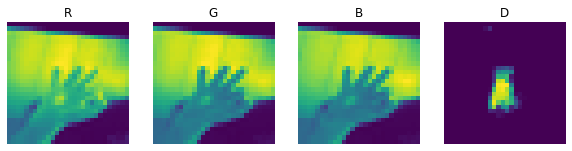

In [1]:
import numpy as np
import pathlib
import torch
from torch import nn

import utils

DATA_PATH = pathlib.Path('../data')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# dataset filenames
train = utils.HandDataset(DATA_PATH/'training_set.mat')
valid = utils.HandDataset(DATA_PATH/'validation_set.mat')

print(train)
print(valid)

train.show_sample()

# dataset iterators
batch_size = 256
train_iter = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_iter = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)


## Softmax regression

In [2]:
net = utils.SoftmaxRegression(n_inputs=np.prod(train.sample_shape), n_outputs=len(train.classes))
loss_function = nn.CrossEntropyLoss()
n_epochs, lr = 50, 0.05
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.5)

In [3]:
utils.train(net, n_epochs, train_iter, loss_function, optimizer, valid_iter)

Training on device: cuda:0
epoch:    0	loss:0.0197	accuracy:0.408	val-accuracy:0.538
epoch:    1	loss:0.015	accuracy:0.467	val-accuracy:0.578
epoch:    2	loss:0.00411	accuracy:0.674	val-accuracy:0.612
epoch:    3	loss:0.00863	accuracy:0.591	val-accuracy:0.701
epoch:    4	loss:0.00532	accuracy:0.675	val-accuracy:0.722
epoch:    5	loss:0.00182	accuracy:0.819	val-accuracy:0.545
epoch:    6	loss:0.00196	accuracy:0.799	val-accuracy:0.671
epoch:    7	loss:0.00135	accuracy:0.863	val-accuracy:0.662
epoch:    8	loss:0.00119	accuracy:0.888	val-accuracy:0.763
epoch:    9	loss:0.00141	accuracy:0.858	val-accuracy:0.762
epoch:   10	loss:0.00103	accuracy:0.907	val-accuracy:0.771
epoch:   11	loss:0.00116	accuracy:0.891	val-accuracy:0.738
epoch:   12	loss:0.00087	accuracy:0.93	val-accuracy:0.781
epoch:   13	loss:0.000973	accuracy:0.912	val-accuracy:0.691
epoch:   14	loss:0.000834	accuracy:0.936	val-accuracy:0.807
epoch:   15	loss:0.000756	accuracy:0.948	val-accuracy:0.809
epoch:   16	loss:0.000783	accu

## LeNet-5

In [6]:
net = utils.LeNet()
net

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 3])


In [7]:
utils.train(net, n_epochs, train_iter, loss_function, optimizer, valid_iter)

Training on device: cuda:0
epoch:    0	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:    1	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:    2	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:    3	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:    4	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:    5	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:    6	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:    7	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:    8	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:    9	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:   10	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:   11	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:   12	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:   13	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:   14	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:   15	loss:0.00446	accuracy:0.333	val-accuracy:0.333
epoch:   16	loss:0.00446	accu

# Test on test set


Sample: 4
Label: fist


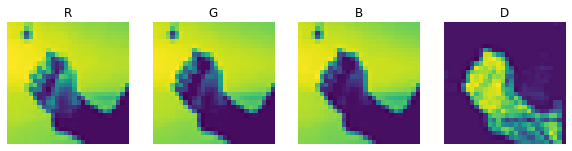

In [6]:
test = utils.HandDataset(DATA_PATH/'test_set.mat')
test.show_sample()
test_iter = torch.utils.data.DataLoader(test, batch_size=len(test), shuffle=False)

In [7]:
net.eval()
for X, y in test_iter:
    # move data to GPU if available
    X, y = X.to(device), y.to(device)
    y_hat = net(X)

print(f"Accuracy: {utils.accuracy(y_hat, y) / len(test):.3}")
print(y)
print(y_hat)


Accuracy: 0.0
tensor([0, 0, 0, 0, 1, 1, 1, 2, 2], device='cuda:0')
tensor([[ 0.0154,  1.4772, -1.0917],
        [-1.5972, -5.8354,  7.6307],
        [-0.7624, -5.6659,  6.6566],
        [-1.3497, -1.3121,  2.9208],
        [-2.0764,  1.0775,  1.2333],
        [-6.0599, -0.3625,  6.6606],
        [-1.9822, -6.1936,  8.3611],
        [ 3.3195, -3.8217,  0.5177],
        [ 6.4221, -8.0453,  1.8680]], device='cuda:0', grad_fn=<AddmmBackward>)


In [8]:
utils.evaluate_accuracy(net, test_iter)

0.0